# Rotate image by 180

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (ZScaleInterval,MinMaxInterval, SqrtStretch,PercentileInterval,ImageNormalize)
from astropy.io import fits

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
transform = ZScaleInterval() + PercentileInterval(90.)
#norm = ImageNormalize(stretch=ZScaleInterval())

In [4]:
DATE=20221207

In [5]:
FILTER="empty~holo4_003"

In [1]:
!ls /sps/lsst/groups/auxtel/data/hack_usdf/

my_postisrccd_img  raw_img


In [6]:
path="/sps/lsst/groups/auxtel/data/hack_usdf/isr_img/"

In [7]:
fullpath=f"{path}/{FILTER}/{DATE}"

In [8]:
all_files = os.listdir(fullpath)

In [9]:
all_files = sorted(all_files)

In [10]:
index=0

In [11]:
fits_image_filename=os.path.join(fullpath,all_files[index])

In [12]:
hdul = fits.open(fits_image_filename)

In [13]:
hdul.info()

Filename: /sps/lsst/groups/auxtel/data/hack_usdf/isr_img/empty~holo4_003/20221207/isr_img_2022120700357_HD185975.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     283   (4072, 4000)   float32   


In [14]:
hdr = hdul[0].header

In [15]:
img = hdul[0].data

In [16]:
norm = ImageNormalize(img, interval=ZScaleInterval(99))

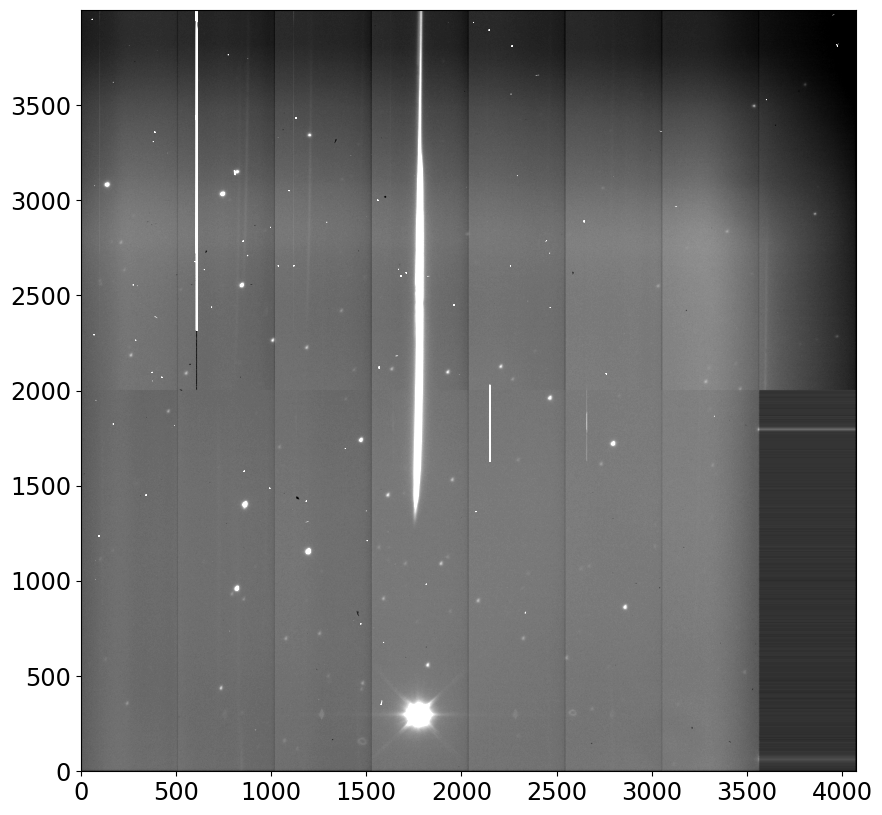

In [17]:
plt.imshow(img,origin="lower",norm=norm,cmap='gray')

In [18]:
rotated_array = img[::-1,::-1]
norm = ImageNormalize(rotated_array, interval=ZScaleInterval(99))

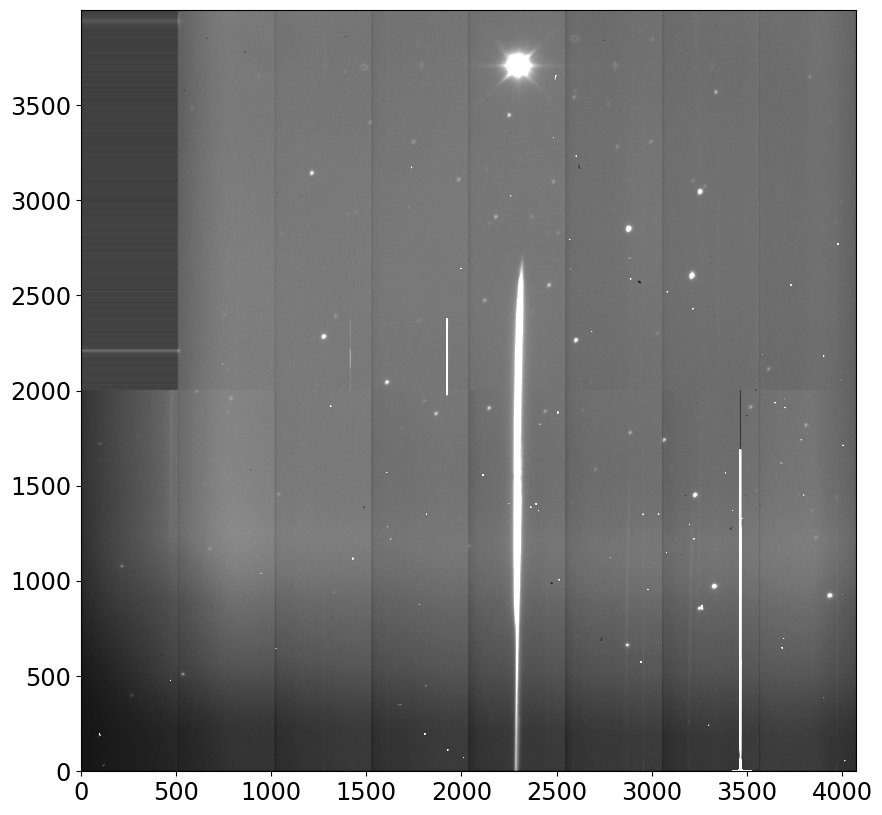

In [19]:
plt.imshow(rotated_array,origin="lower",norm=norm,cmap='gray')

In [20]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4072                                                  
NAXIS2  =                 4000                                                  
CCD_MANU= 'ITL     '                                                            
CCD_TYPE= '3800C   '                                                            
BINX    =                    1                                                  
BINY    =                    1                                                  
CCDGAIN =                  1.0                                                  
CCDNOISE=                 10.0                                                  
CCDSLOT = 'S00     '                                                            
RAFTBAY = 'R00     '        